In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None # hide some warnings

In [2]:
# Read dog data, extract rating into new dataframe
dog_data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])
dog_data = dog_data[dog_data['text'].str.contains('\d+\/10')]

In [3]:
# Extract exact rating and cast as float
dog_data['rating'] = dog_data['text'].str.extract(pat= r'(\d*?)\/10')
dog_data['rating'] = dog_data['rating'].astype(float)

In [4]:
# Filter ratings that are less than or equal to 25
dog_data = dog_data[dog_data['rating'] <= 25]
#dog_data.dtypes

In [5]:
# Show scatterplot of results so far
#plt.plot(dog_data['created_at'], dog_data['rating'], '.')

In [6]:
# Extract timestamp into new column
dog_data['timestamp'] = dog_data['created_at'].apply(lambda date : date.timestamp())

In [7]:
# Set up linear regression, print relevant parameters
reg = stats.linregress(dog_data['timestamp'], dog_data['rating'])
print('Regression slope: ', reg.slope)
print('Regression intercept: ', reg.intercept)

Regression slope:  3.501637950146532e-08
Regression intercept:  -40.254694225409395


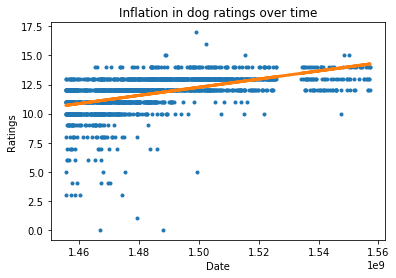

In [8]:
# Set up plot
plt.xlabel('Date')
plt.ylabel('Ratings')
plt.title('Inflation in dog ratings over time')
plt.plot(dog_data['timestamp'], dog_data['rating'], '.')
plt.plot(dog_data['timestamp'], reg.slope*dog_data['timestamp'] + reg.intercept, linewidth= 3)

Regression p-value:  1.6092573688246278e-104


(array([  3.,   0.,   9.,   5.,  21.,  58., 501., 912., 154.,   4.]),
 array([-11.84795675, -10.18676156,  -8.52556637,  -6.86437118,
         -5.20317599,  -3.5419808 ,  -1.8807856 ,  -0.21959041,
          1.44160478,   3.10279997,   4.76399516]),
 <a list of 10 Patch objects>)

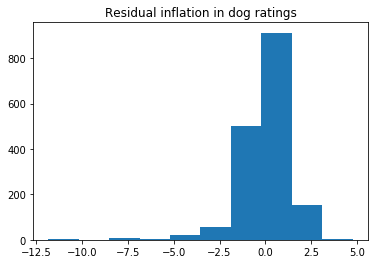

In [11]:
# Make histogram of residuals
plt.title('Residual inflation in dog ratings')
plt.hist(dog_data['rating'] - (reg.slope*dog_data['timestamp'] + reg.intercept))

In [12]:
# Regression p-value
print('Regression p-value: ', reg.pvalue)

Regression p-value:  1.6092573688246278e-104
